Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

Read the Dataset

In [2]:
data = pd.read_csv("./FuelConsumptionCO2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


For this ML Algortihm we'll concentrate on the feature ENGINESIZE on the CO2EMISSIONS

In [3]:
data = data[["ENGINESIZE","CO2EMISSIONS"]]

Plotting ENGINESIZE vs CO2EMISSIONS graph

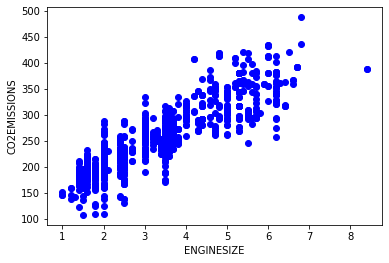

In [4]:
plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

Generating training and testing data from the dataset 'data'

In [5]:
train = data[:(int((len(data)*0.85)))] #Using 85% data as training dataset
test = data[(int((len(data)*0.85))):]

Creating and fitting the Linear Regression Model

In [6]:
regr = linear_model.LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression()

Printing the Co-efficients (Slope & Intercept)

In [7]:
print ("Co-efficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept

Co-efficients :  [[38.99321769]]
Intercept :  [126.04122128]


Plotting the regression line

Text(0, 0.5, 'Emission')

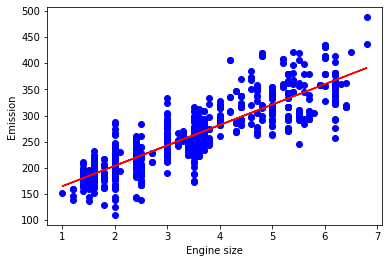

In [8]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Checking the Accuracy

In [9]:
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.61
Mean sum of squares (MSE): 796.58
R2-score: 0.74


Predicting the emission of a car based on Engine size

In [11]:
eng_size = int(input("Enter The Engine Size "))
pred_emission = (eng_size*regr.coef_[0][0])+regr.intercept_[0]
print ("Estimated Emission based on Engine Size: %.2f" % pred_emission)

Enter The Engine Size 4
Estimated Emission based on Engine Size: 282.01
